In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [6]:
from keras.utils import np_utils

# one-hot encoding

In [7]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

# model_1: 
# hidden_dim = 20
# hidden_layers = 3 
# epoch = 50
# Activation function: Sigmoid
# Optimizer: SGD(lr=0.5)
# Normalization: NO

In [21]:
model_1 = Sequential()
model_1.add(Dense(20, input_dim=784))
model_1.add(Activation('sigmoid'))
model_1.add(Dense(20))
model_1.add(Activation('sigmoid'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))
model_1.compile(loss='mse',optimizer=SGD(lr=0.5),metrics=['acc'])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_13 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_14 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_15 (Activation)   (None, 10)                0         
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [22]:
MODEL1 = model_1.fit(x_train,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0828 - acc: 0.3426 - val_loss: 0.0739 - val_acc: 0.3991
Epoch 2/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0659 - acc: 0.5029 - val_loss: 0.0593 - val_acc: 0.6091
Epoch 3/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0534 - acc: 0.6583 - val_loss: 0.0488 - val_acc: 0.7276
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0433 - acc: 0.7511 - val_loss: 0.0375 - val_acc: 0.7877
Epoch 5/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0346 - acc: 0.8019 - val_loss: 0.0331 - val_acc: 0.8151
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0291 - acc: 0.8332 - val_loss: 0.0259 - val_acc: 0.8553
Epoch 7/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0268 - acc: 0.8376 - val_loss: 0.0263 - val_acc

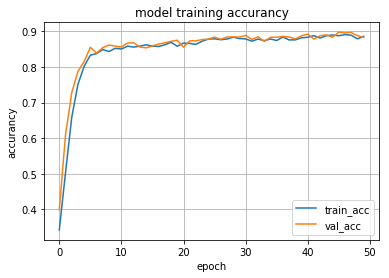

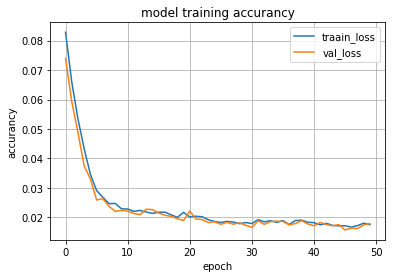

In [23]:
plt.plot(MODEL1.history['acc'])
plt.plot(MODEL1.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL1.history['loss'])
plt.plot(MODEL1.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

In [24]:
y_predict = model_1.predict_classes(x_test)
y_predict = np_utils.to_categorical(y_predict,10)

In [25]:
from sklearn.metrics import confusion_matrix

# model_1 confusion_matrix

In [26]:
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 946,    0,    2,    1,    2,    5,   13,    3,    7,    1],
       [   0, 1092,    6,    5,    2,    0,    5,    2,   18,    5],
       [  10,    2,  835,   34,   22,   10,   32,   16,   60,   11],
       [   2,    3,   32,  844,    5,   49,    5,   13,   48,    9],
       [   1,   11,    3,    0,  896,    0,   11,    1,    5,   54],
       [  10,    0,    5,   62,   18,  702,   23,   17,   39,   16],
       [  17,    1,   10,    0,    8,   20,  887,    3,   12,    0],
       [   3,   18,   23,   10,    9,    0,    3,  929,    1,   32],
       [   6,    8,    7,   16,   14,   27,   20,    4,  829,   43],
       [   9,    5,    0,   10,   42,   12,    1,   16,   42,  872]],
      dtype=int64)

# Normalization

In [11]:
x_train_n = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test_n = (x_test - x_test.min())/(x_test.max() - x_test.min())

# model_2: 
# hidden_dim = 20
# hidden_layers = 3 
# epoch = 50
# Activation function: Sigmoid
# Optimizer: SGD(lr=0.5)
# Normalization: Yes

In [28]:
model_2 = Sequential()
model_2.add(Dense(20, input_dim=784))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(20))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))
model_2.compile(loss='mse',optimizer=SGD(lr=0.5),metrics=['acc'])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_16 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_17 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [29]:
MODEL2 = model_2.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0899 - acc: 0.1402 - val_loss: 0.0890 - val_acc: 0.1909
Epoch 2/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0881 - acc: 0.2399 - val_loss: 0.0867 - val_acc: 0.2639
Epoch 3/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0839 - acc: 0.2796 - val_loss: 0.0803 - val_acc: 0.2956
Epoch 4/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.0772 - acc: 0.3340 - val_loss: 0.0736 - val_acc: 0.3810
Epoch 5/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.0702 - acc: 0.4344 - val_loss: 0.0662 - val_acc: 0.5033
Epoch 6/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.0630 - acc: 0.5421 - val_loss: 0.0593 - val_acc: 0.5997
Epoch 7/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0559 - acc: 0.6335 - val_loss: 0.0518 - val_acc

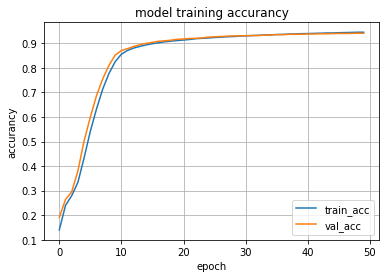

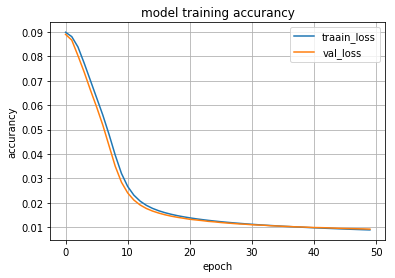

In [30]:
plt.plot(MODEL2.history['acc'])
plt.plot(MODEL2.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL2.history['loss'])
plt.plot(MODEL2.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_2 confusion_matrix

In [31]:
y_predict = model_2.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 960,    0,    0,    2,    0,    5,    6,    4,    3,    0],
       [   0, 1111,    2,    4,    0,    1,    4,    3,   10,    0],
       [  12,    3,  957,    7,   13,    5,    8,   11,   15,    1],
       [   2,    0,   22,  944,    1,   16,    0,    9,   12,    4],
       [   1,    0,    5,    0,  931,    2,   12,    2,    1,   28],
       [   9,    1,    4,   22,    1,  813,   13,   11,   11,    7],
       [  16,    3,    9,    0,   10,   11,  903,    2,    4,    0],
       [   4,    9,   21,    5,    6,    1,    0,  961,    1,   20],
       [   5,    3,    7,   17,   11,   17,    8,    4,  897,    5],
       [   4,    8,    2,   13,   21,   10,    2,   14,    6,  929]],
      dtype=int64)

In [12]:
from keras.optimizers import Adam

# model_3: 
# hidden_dim = 20
# hidden_layers = 3 
# epoch = 50
# Activation function: Sigmoid
# Optimizer: Adam(lr=0.001beta_1=0.9, beta_2=0.999,            epsilon=None, decay=0.0, amsgrad=False)
# Normalization: Yes

In [34]:
model_3 = Sequential()
model_3.add(Dense(20, input_dim=784))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(20))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))
model_3.compile(loss='mse',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['acc'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_19 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_20 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [35]:
MODEL3 = model_3.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0523 - acc: 0.6671 - val_loss: 0.0224 - val_acc: 0.8843
Epoch 2/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.0171 - acc: 0.9006 - val_loss: 0.0138 - val_acc: 0.9127
Epoch 3/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0127 - acc: 0.9204 - val_loss: 0.0118 - val_acc: 0.9241
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0110 - acc: 0.9305 - val_loss: 0.0106 - val_acc: 0.9315
Epoch 5/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0098 - acc: 0.9378 - val_loss: 0.0098 - val_acc: 0.9346
Epoch 6/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0090 - acc: 0.9428 - val_loss: 0.0095 - val_acc: 0.9371
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0084 - acc: 0.9474 - val_loss: 0.0089 - val_acc

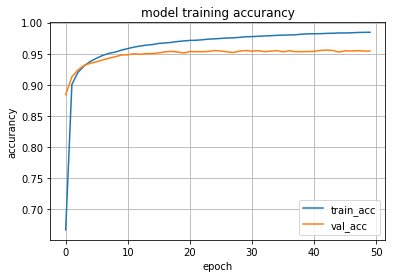

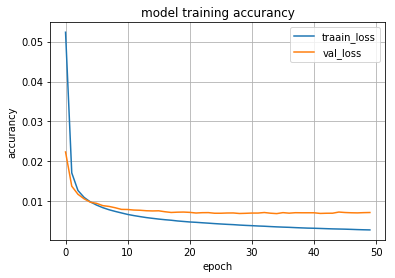

In [36]:
plt.plot(MODEL3.history['acc'])
plt.plot(MODEL3.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL3.history['loss'])
plt.plot(MODEL3.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_3 confusion_matrix

In [37]:
y_predict = model_3.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 950,    0,    2,    1,    2,   11,    7,    6,    0,    1],
       [   0, 1117,    4,    2,    0,    3,    3,    2,    4,    0],
       [   9,    3,  979,    8,    5,    2,    8,    7,   11,    0],
       [   5,    1,   16,  961,    0,    7,    1,    5,   11,    3],
       [   4,    2,    1,    0,  943,    2,   11,    3,    2,   14],
       [   8,    3,    2,   15,    1,  832,   10,    4,    9,    8],
       [  12,    3,    1,    0,    3,    9,  920,    1,    9,    0],
       [   2,    6,   19,    9,    8,    0,    0,  973,    2,    9],
       [   6,    3,    8,    7,    8,    5,   10,    2,  922,    3],
       [   6,    3,    1,    9,   24,    7,    1,    5,    7,  946]],
      dtype=int64)

# model_4: 
# hidden_dim = 20
# hidden_layers = 3 
# epoch = 50
# Activation function: Relu
# Optimizer: Adam(lr=0.001beta_1=0.9, beta_2=0.999,            epsilon=None, decay=0.0, amsgrad=False)
# Normalization: Yes

In [38]:
model_4 = Sequential()
model_4.add(Dense(20, input_dim=784))
model_4.add(Activation('relu'))
model_4.add(Dense(20))
model_4.add(Activation('relu'))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))
model_4.compile(loss='mse',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['acc'])
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_22 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_23 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [39]:
MODEL4 = model_4.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0217 - acc: 0.8523 - val_loss: 0.0120 - val_acc: 0.9239
Epoch 2/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.0105 - acc: 0.9318 - val_loss: 0.0091 - val_acc: 0.9427
Epoch 3/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0090 - acc: 0.9423 - val_loss: 0.0088 - val_acc: 0.9430
Epoch 4/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.0081 - acc: 0.9488 - val_loss: 0.0079 - val_acc: 0.9492
Epoch 5/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.0073 - acc: 0.9532 - val_loss: 0.0079 - val_acc: 0.9496
Epoch 6/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.0068 - acc: 0.9566 - val_loss: 0.0074 - val_acc: 0.9520
Epoch 7/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0065 - acc: 0.9596 - val_loss: 0.0073 - val_acc

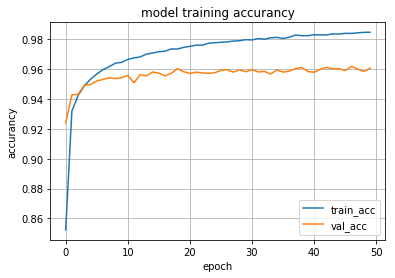

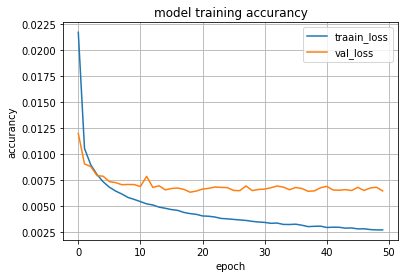

In [41]:
plt.plot(MODEL4.history['acc'])
plt.plot(MODEL4.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL4.history['loss'])
plt.plot(MODEL4.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_4 confusion_matrix

In [42]:
y_predict = model_4.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 962,    0,    1,    3,    0,    5,    4,    1,    4,    0],
       [   0, 1123,    5,    0,    0,    2,    2,    1,    2,    0],
       [   5,    2,  999,    9,    2,    1,    6,    5,    3,    0],
       [   0,    1,   18,  968,    1,    9,    2,    5,    6,    0],
       [   1,    0,    4,    2,  947,    2,    7,    7,    2,   10],
       [   7,    3,    4,   16,    1,  837,    7,    3,    9,    5],
       [  10,    2,   10,    1,    5,    9,  920,    1,    0,    0],
       [   0,    6,   17,    5,    3,    2,    0,  984,    3,    8],
       [   5,    4,   12,   16,    4,    5,    3,    8,  913,    4],
       [   4,    4,    0,   13,   14,    3,    0,    8,   11,  952]],
      dtype=int64)

# model_5: 
# hidden_dim = 50
# hidden_layers = 4 
# epoch = 50
# Activation function: Relu
# Optimizer: Adam(lr=0.001beta_1=0.9, beta_2=0.999,            epsilon=None, decay=0.0, amsgrad=False)
# Normalization: Yes

In [43]:
model_5 = Sequential()
model_5.add(Dense(50, input_dim=784))
model_5.add(Activation('relu'))
model_5.add(Dense(50))
model_5.add(Activation('relu'))
model_5.add(Dense(50))
model_5.add(Activation('relu'))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))
model_5.compile(loss='mse',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['acc'])
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_25 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_26 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_27 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                510       
__________

In [44]:
MODEL5 = model_5.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.0154 - acc: 0.9002 - val_loss: 0.0085 - val_acc: 0.9444
Epoch 2/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.0072 - acc: 0.9534 - val_loss: 0.0068 - val_acc: 0.9559
Epoch 3/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.0055 - acc: 0.9645 - val_loss: 0.0055 - val_acc: 0.9640
Epoch 4/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.0046 - acc: 0.9712 - val_loss: 0.0060 - val_acc: 0.9618
Epoch 5/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.0042 - acc: 0.9736 - val_loss: 0.0051 - val_acc: 0.9664
Epoch 6/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.0037 - acc: 0.9768 - val_loss: 0.0045 - val_acc: 0.9721
Epoch 7/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.0033 - acc: 0.9794 - val_loss: 0.0045 - val_acc

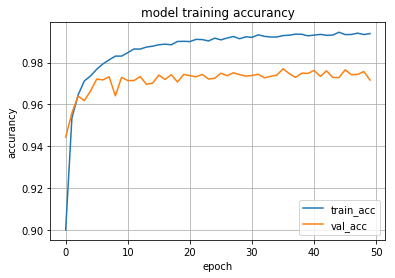

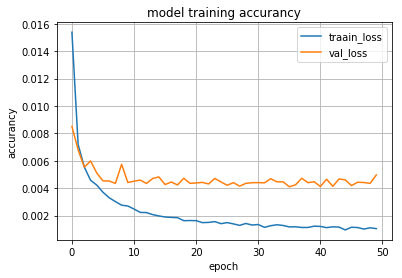

In [45]:
plt.plot(MODEL5.history['acc'])
plt.plot(MODEL5.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL5.history['loss'])
plt.plot(MODEL5.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_5 confusion_matrix

In [46]:
y_predict = model_5.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 967,    1,    5,    2,    1,    0,    0,    1,    3,    0],
       [   0, 1115,    1,    1,    0,    0,    2,    2,   14,    0],
       [   3,    2, 1007,    5,    1,    0,    1,    6,    6,    1],
       [   0,    0,    3,  987,    0,    3,    0,    6,    5,    6],
       [   3,    0,    3,    0,  945,    0,    5,    3,    7,   16],
       [   3,    1,    0,   20,    0,  851,    1,    2,   11,    3],
       [  12,    2,    5,    1,    4,    9,  912,    2,   11,    0],
       [   0,    2,    8,    2,    0,    0,    0, 1005,    3,    8],
       [   4,    0,    7,   10,    4,    3,    0,    2,  941,    3],
       [   3,    2,    0,    3,    4,    2,    1,    0,    8,  986]],
      dtype=int64)

# model_6: 
# hidden_dim = 60
# hidden_layers = 4 
# epoch = 50
# Activation function: Relu
# Optimizer: Adam(lr=0.001beta_1=0.9, beta_2=0.999,            epsilon=None, decay=0.0, amsgrad=False)
# Normalization: Yes

In [16]:
model_6 = Sequential()
model_6.add(Dense(60, input_dim=784))
model_6.add(Activation('relu'))
model_6.add(Dense(60))
model_6.add(Activation('relu'))
model_6.add(Dense(60))
model_6.add(Activation('relu'))
model_6.add(Dense(10))
model_6.add(Activation('softmax'))
model_6.compile(loss='mse',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['acc'])
model_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 60)                47100     
_________________________________________________________________
activation_9 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 60)                3660      
_________________________________________________________________
activation_10 (Activation)   (None, 60)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 60)                3660      
_________________________________________________________________
activation_11 (Activation)   (None, 60)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                610       
__________

In [17]:
MODEL6 = model_6.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.0149 - acc: 0.8997 - val_loss: 0.0079 - val_acc: 0.9480
Epoch 2/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0070 - acc: 0.9547 - val_loss: 0.0059 - val_acc: 0.9612
Epoch 3/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.0054 - acc: 0.9649 - val_loss: 0.0056 - val_acc: 0.9636
Epoch 4/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0045 - acc: 0.9716 - val_loss: 0.0051 - val_acc: 0.9654
Epoch 5/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.0039 - acc: 0.9755 - val_loss: 0.0053 - val_acc: 0.9663
Epoch 6/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0034 - acc: 0.9785 - val_loss: 0.0045 - val_acc: 0.9711
Epoch 7/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0030 - acc: 0.9806 - val_loss: 0.0045 - val_acc

In [32]:
model_6.save('handwriting_model_weights.h5')

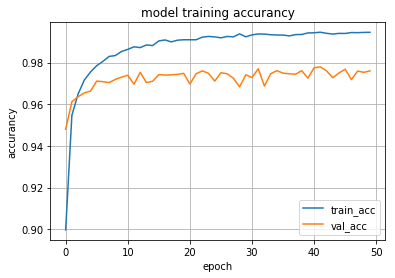

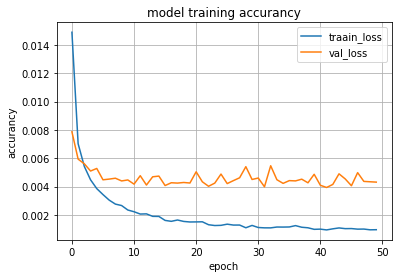

In [33]:
plt.plot(MODEL6.history['acc'])
plt.plot(MODEL6.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL6.history['loss'])
plt.plot(MODEL6.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_6 confusion_matrix

In [20]:
y_predict = model_6.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 972,    1,    2,    0,    1,    0,    1,    2,    1,    0],
       [   0, 1125,    3,    0,    0,    1,    2,    2,    2,    0],
       [   7,    0, 1005,    2,    2,    0,    4,    7,    5,    0],
       [   1,    0,    1,  986,    0,    6,    0,    8,    6,    2],
       [   0,    0,    2,    0,  960,    0,    6,    2,    1,   11],
       [   2,    0,    0,    8,    1,  869,    5,    1,    2,    4],
       [   8,    3,    1,    0,    2,    1,  938,    0,    5,    0],
       [   0,    3,   12,    1,    1,    1,    1, 1007,    0,    2],
       [   6,    0,    7,   10,    4,    9,    2,    5,  927,    4],
       [   3,    2,    0,    3,   12,    3,    0,   10,    5,  971]],
      dtype=int64)

In [47]:
score = model_1.evaluate(x_test,y_test)
print(f'model_1 loss:{score[0]}, accurancy:{score[1]}')
score = model_2.evaluate(x_test_n,y_test)
print(f'model_2 loss:{score[0]}, accurancy:{score[1]}')
score = model_3.evaluate(x_test_n,y_test)
print(f'model_3 loss:{score[0]}, accurancy:{score[1]}')
score = model_4.evaluate(x_test_n,y_test)
print(f'model_4 loss:{score[0]}, accurancy:{score[1]}')
score = model_5.evaluate(x_test_n,y_test)
print(f'model_5 loss:{score[0]}, accurancy:{score[1]}')
score = model_6.evaluate(x_test_n,y_test)
print(f'model_6 loss:{score[0]}, accurancy:{score[1]}')

10000/10000 [==============================] - 0s 35us/step
model_1 loss:0.017894322891905904, accurancy:0.8832
10000/10000 [==============================] - 0s 29us/step
model_2 loss:0.009166644023684785, accurancy:0.9406
10000/10000 [==============================] - 0s 29us/step
model_3 loss:0.007191819749362367, accurancy:0.9543
10000/10000 [==============================] - 0s 31us/step
model_4 loss:0.006471812442025845, accurancy:0.9605
10000/10000 [==============================] - 0s 37us/step
model_5 loss:0.0049661615556825444, accurancy:0.9716
10000/10000 [==============================] - 0s 38us/step
model_6 loss:0.004314897331982377, accurancy:0.976


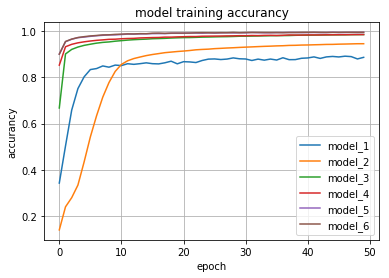

In [48]:
plt.plot(MODEL1.history['acc'])
plt.plot(MODEL2.history['acc'])
plt.plot(MODEL3.history['acc'])
plt.plot(MODEL4.history['acc'])
plt.plot(MODEL5.history['acc'])
plt.plot(MODEL6.history['acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5','model_6'],loc='best')
plt.grid()
plt.show()

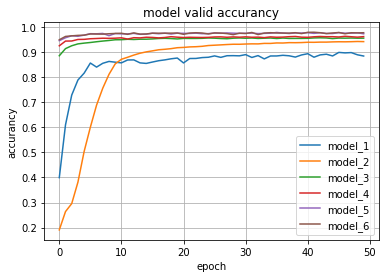

In [49]:
plt.plot(MODEL1.history['val_acc'])
plt.plot(MODEL2.history['val_acc'])
plt.plot(MODEL3.history['val_acc'])
plt.plot(MODEL4.history['val_acc'])
plt.plot(MODEL5.history['val_acc'])
plt.plot(MODEL6.history['val_acc'])
plt.title('model valid accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5','model_6'],loc='best')
plt.grid()
plt.show()

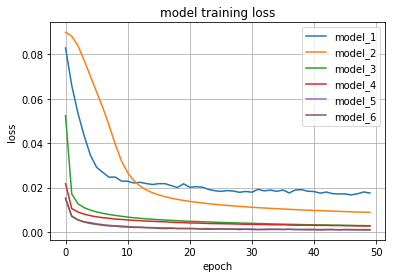

In [50]:
plt.plot(MODEL1.history['loss'])
plt.plot(MODEL2.history['loss'])
plt.plot(MODEL3.history['loss'])
plt.plot(MODEL4.history['loss'])
plt.plot(MODEL5.history['loss'])
plt.plot(MODEL6.history['loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5','model_6'],loc='best')
plt.grid()
plt.show()

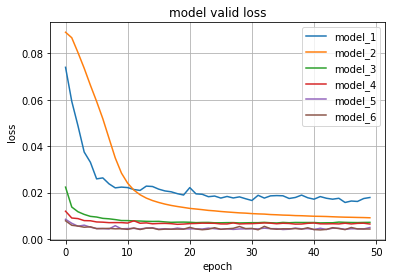

In [51]:
plt.plot(MODEL1.history['val_loss'])
plt.plot(MODEL2.history['val_loss'])
plt.plot(MODEL3.history['val_loss'])
plt.plot(MODEL4.history['val_loss'])
plt.plot(MODEL5.history['val_loss'])
plt.plot(MODEL6.history['val_loss'])
plt.title('model valid loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5','model_6'],loc='best')
plt.grid()
plt.show()